### tau experiment

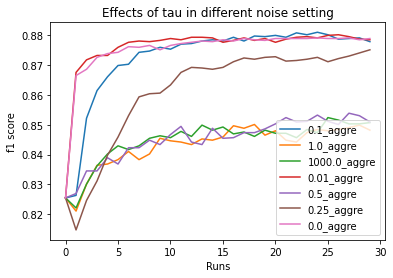

In [22]:
import numpy as np
from pathlib import Path
from matplotlib import pyplot as plt


root_path = Path("/home/vramanathan/Projects/ReCoV/results/cifar")

# feat = ["aggre","worst"]
feat = ["aggre"]
tau = [0.1,1.0,1000.0,0.01,0.5,0.25,0.0]

fig = plt.figure()
for j in feat:
    for i in range(len(tau)):
        file_path = root_path / f"f1score_{j}_{tau[i]}_dinov2_30.npy"
        with open(str(file_path),"rb") as f:
            f1list = np.load(f)
        plt.plot(np.arange(len(f1list)),f1list,label=f'{tau[i]}_{j}')
plt.xlabel("Runs")
plt.ylabel("f1 score")
plt.legend()
plt.title(f"Effects of tau in different noise setting")
plt.show()

In [20]:
file_path = root_path / f"f1score_{feat[0]}_{tau[-1]}_dinov2_30.npy"
with open(str(file_path),"rb") as f:
    f1list1 = np.load(f)

# file_path = root_path / f"f1score_{j}_{tau[0]}_dinov2_30.npy"
# with open(str(file_path),"rb") as f:
#     f1list0 = np.load(f)
f1list1

array([0.62841287, 0.8108768 , 0.84417314, 0.8654828 , 0.87413984,
       0.88035516, 0.88279689, 0.88412875, 0.8854606 , 0.88523862,
       0.88657048, 0.88790233, 0.88856826, 0.88856826, 0.88990011,
       0.88945616, 0.88901221, 0.89012209, 0.89034406, 0.89012209,
       0.89167592, 0.89123196, 0.89078801, 0.89100999, 0.89078801,
       0.88967814, 0.88990011, 0.89056604, 0.88967814, 0.89034406])

In [21]:
file_path = root_path / f"f1score_{feat[0]}_{tau[2]}_dinov2_30.npy"
with open(str(file_path),"rb") as f:
    f1list1 = np.load(f)

# file_path = root_path / f"f1score_{j}_{tau[0]}_dinov2_30.npy"
# with open(str(file_path),"rb") as f:
#     f1list0 = np.load(f)
f1list1

array([0.62841287, 0.8108768 , 0.84417314, 0.8654828 , 0.87413984,
       0.88035516, 0.88279689, 0.88412875, 0.8854606 , 0.88523862,
       0.88657048, 0.88790233, 0.88856826, 0.88856826, 0.88990011,
       0.88945616, 0.88901221, 0.89012209, 0.89034406, 0.89012209,
       0.89167592, 0.89123196, 0.89078801, 0.89100999, 0.89078801,
       0.88967814, 0.88990011, 0.89056604, 0.88967814, 0.89034406])

In [18]:
f1list1

array([0.62841287, 0.8108768 , 0.84417314, 0.8654828 , 0.87413984,
       0.88035516, 0.88279689, 0.88412875, 0.8854606 , 0.88523862,
       0.88657048, 0.88790233, 0.88856826, 0.88856826, 0.88990011,
       0.88945616, 0.88901221, 0.89012209, 0.89034406, 0.89012209,
       0.89167592, 0.89123196, 0.89078801, 0.89100999, 0.89078801,
       0.88967814, 0.88990011, 0.89056604, 0.88967814, 0.89034406])

### Rough

In [1]:
import torch
from torchvision import datasets
from torchvision import transforms
import tqdm
import h5py

In [2]:
model = torch.hub.load('facebookresearch/dinov2', 'dinov2_vits14')

Using cache found in C:\Users\TonyX/.cache\torch\hub\facebookresearch_dinov2_main
xFormers not available
xFormers not available


In [3]:
print(model)

DinoVisionTransformer(
  (patch_embed): PatchEmbed(
    (proj): Conv2d(3, 384, kernel_size=(14, 14), stride=(14, 14))
    (norm): Identity()
  )
  (blocks): ModuleList(
    (0-11): 12 x NestedTensorBlock(
      (norm1): LayerNorm((384,), eps=1e-06, elementwise_affine=True)
      (attn): MemEffAttention(
        (qkv): Linear(in_features=384, out_features=1152, bias=True)
        (attn_drop): Dropout(p=0.0, inplace=False)
        (proj): Linear(in_features=384, out_features=384, bias=True)
        (proj_drop): Dropout(p=0.0, inplace=False)
      )
      (ls1): LayerScale()
      (drop_path1): Identity()
      (norm2): LayerNorm((384,), eps=1e-06, elementwise_affine=True)
      (mlp): Mlp(
        (fc1): Linear(in_features=384, out_features=1536, bias=True)
        (act): GELU(approximate='none')
        (fc2): Linear(in_features=1536, out_features=384, bias=True)
        (drop): Dropout(p=0.0, inplace=False)
      )
      (ls2): LayerScale()
      (drop_path2): Identity()
    )
  )
  (n

In [4]:
# example input shape
x = torch.randn(4, 3, 224, 224)
print(model(x).shape)

torch.Size([4, 384])


In [5]:
batch_size = 4

img_trans = transforms.Compose([
    transforms.Resize(256, interpolation=3),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=img_trans)
train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=False, num_workers=2)

testset = datasets.CIFAR10(root='./data', train=False, download=True, transform=img_trans)
test_loader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


In [6]:
model = model.cuda()
model.eval()

with torch.no_grad():
    train_feats = []
    train_labels = []
    for img, label in tqdm.tqdm(train_loader):
        img= img.cuda()

        feats = model(img)

        train_feats.extend(feats.cpu().numpy())
        train_labels.extend(label.numpy())
        
with torch.no_grad():
    test_feats = []
    test_labels = []
    for img, label in tqdm.tqdm(test_loader):
        img= img.cuda()

        feats = model(img)

        test_feats.extend(feats.cpu().numpy())
        test_labels.extend(label.numpy())

100%|██████████████████████████████████████████████████████████████████████████████| 2500/2500 [01:08<00:00, 36.57it/s]


In [7]:
print(len(train_feats), len(train_labels))
print(len(test_feats), len(test_labels))

with h5py.File('cifar_feats.h5', 'w') as f:
    f.create_dataset('train_feats', data=train_feats)
    f.create_dataset('train_labels', data=train_labels)
    f.create_dataset('test_feats', data=test_feats)
    f.create_dataset('test_labels', data=test_labels)


50000 50000
10000 10000


In [8]:
with h5py.File('cifar_feats.h5', 'r') as f:
    print(f['train_feats'][0])
    print(f['train_labels'][0])
    
    print(f['test_feats'][0])
    print(f['test_labels'][0])

[-2.93876863e+00 -3.18079162e+00  2.80617905e+00 -1.52512252e+00
  7.08356738e-01 -1.50645649e+00 -3.47727567e-01  2.70389467e-01
  7.01538026e-01 -2.80950904e+00 -9.12385583e-01 -2.27106714e+00
 -2.85190749e+00  1.57262588e+00  1.46337140e+00  2.30143952e+00
  2.55047107e+00  2.15715504e+00 -4.55675095e-01 -1.13704741e+00
  1.84042513e-01 -1.45493460e+00 -2.17402935e+00  1.26784992e+00
 -9.65033054e-01 -2.83909273e+00  1.94110167e+00 -1.52428794e+00
  5.22937000e-01 -1.45351851e+00  1.42631185e+00 -3.44422549e-01
  3.50131989e+00  5.50223410e-01  3.46086597e+00 -3.52418542e+00
  4.38795805e+00  8.59452963e-01 -3.74193072e+00 -5.77792215e+00
  3.68453288e+00  9.06587780e-01  1.43136871e+00  3.63013506e+00
  2.98478341e+00 -1.18768919e+00 -1.41478610e+00  5.35106301e-01
 -9.04244125e-01  2.54220462e+00 -2.74178576e+00 -5.62465096e+00
  2.72016382e+00 -3.97368097e+00 -2.77389026e+00  3.90623033e-01
 -2.61901945e-01  4.80436236e-01  1.36757278e+00 -1.19954240e+00
  3.90945745e+00 -5.98177